# **The Least Well Known Presidential Candidate Classifier Project**

The 2020 democratic presidential primary is effectively over, but when it was in full swing, there were over 20 people vying to be the democratic nominee for President. Of those people, few were [less well known](https://www.businessinsider.com/most-least-well-known-democratic-candidates-among-democratic-voters-2019-5) than Michael Bennet, Steve Bullock, Seth Moulton, and Eric Swalwell. These forgotten four are the subject of this image recognition project.

This program seeks to do what many Americans could not in 2019, recognize pictures of four failed presidential candidates using over 400 photos gathered from google images using the [Fatkun Image Downloader Chrome extension](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf). 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs= 32

In [0]:
path = Path(os.getcwd())

In [0]:
path = path/'drive'/'My Drive'/'Colab Notebooks'/'Fastai - 1 '/'LWKPC'

In [0]:
data = ImageDataBunch.from_folder(path, valid_pct = .2, bs = bs, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [7]:
print(data.classes)
len(data.classes),data.c

['eric_swalwell', 'michael_bennet', 'seth_moulton', 'steve_bullock']


(4, 4)

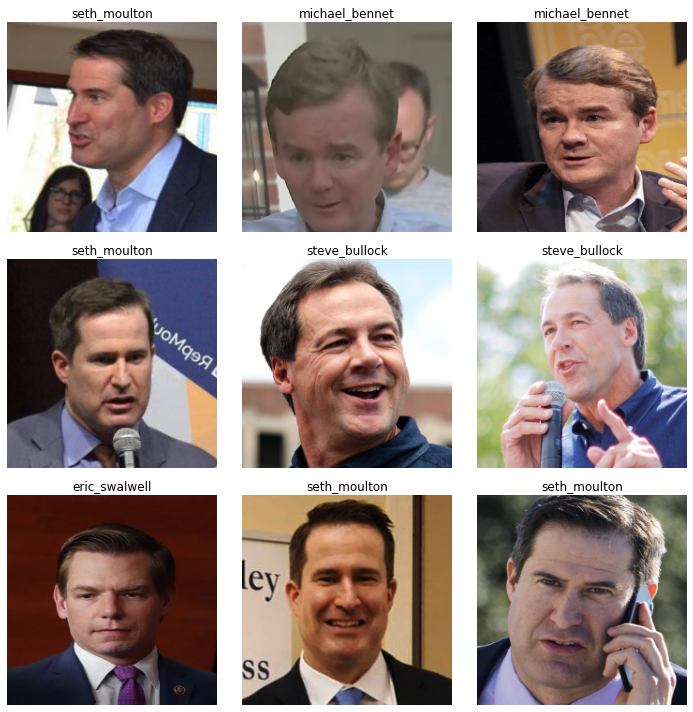

In [11]:
data.show_batch(rows=3, figsize=(10, 10))

The photos were originally different sizes and the subjects were often not centered. I cropped the pictures to set the subject in the center of the pictures. Some were distorted pretty significantly.

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.138189,1.531957,0.607843,01:21
1,1.437450,0.816819,0.264706,00:16
2,1.091386,0.677819,0.235294,00:14
3,0.882833,0.609901,0.235294,00:13


The Model achieves over 75% accuracy right off the bat. 

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

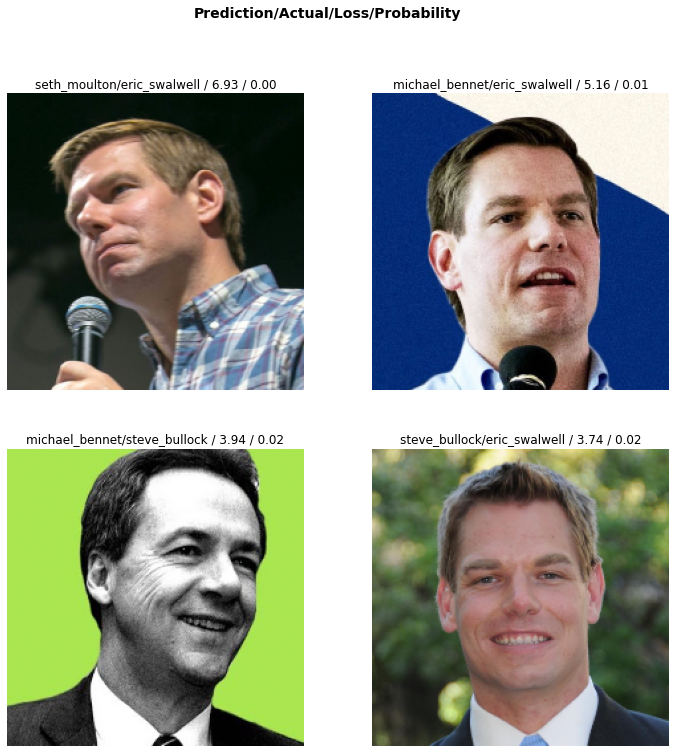

In [14]:
interp.plot_top_losses(4)

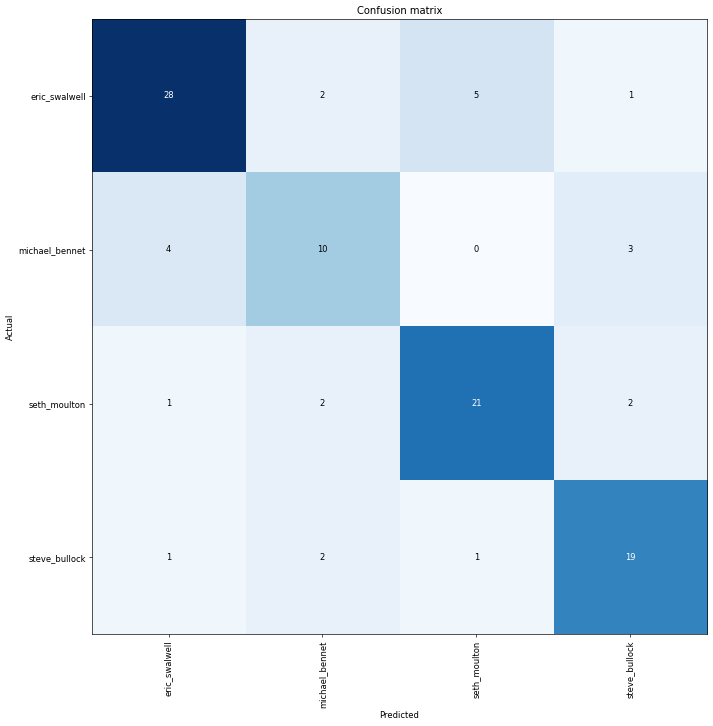

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


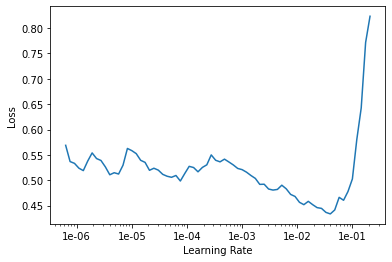

In [17]:
learn.recorder.plot()

Based on the advice from the first lesson, I tried to find the optimal learning rate. It is between 1e-02 and 1e-01. 

In [18]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.617977,0.811806,0.196078,00:13
1,0.858529,3.217687,0.323529,00:14
2,0.611634,0.313660,0.078431,00:14
3,0.435908,0.104394,0.029412,00:14


Using the optimal learn rate, I unfroze the model and trained it again using the different learn rate. I saw a significant decrease in error rate as the accuracy shot up to just over 97%.

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

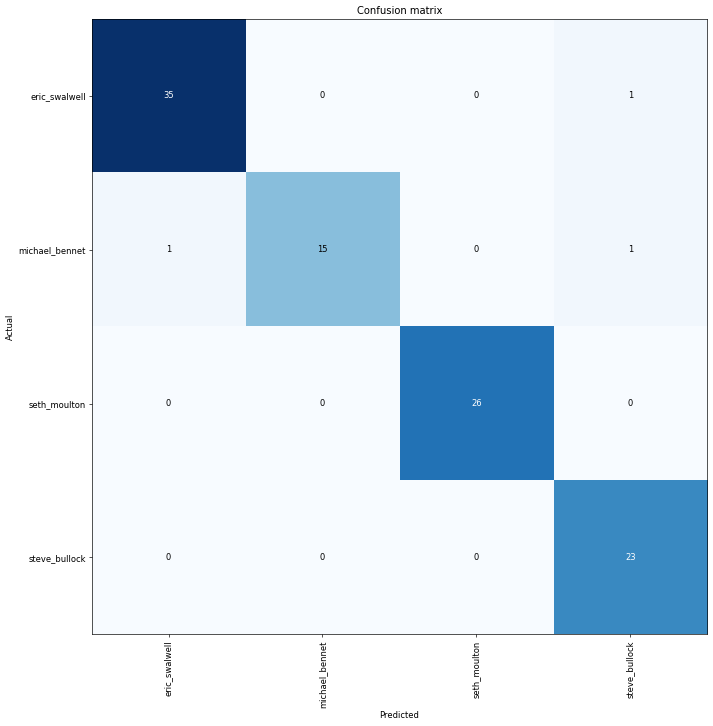

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

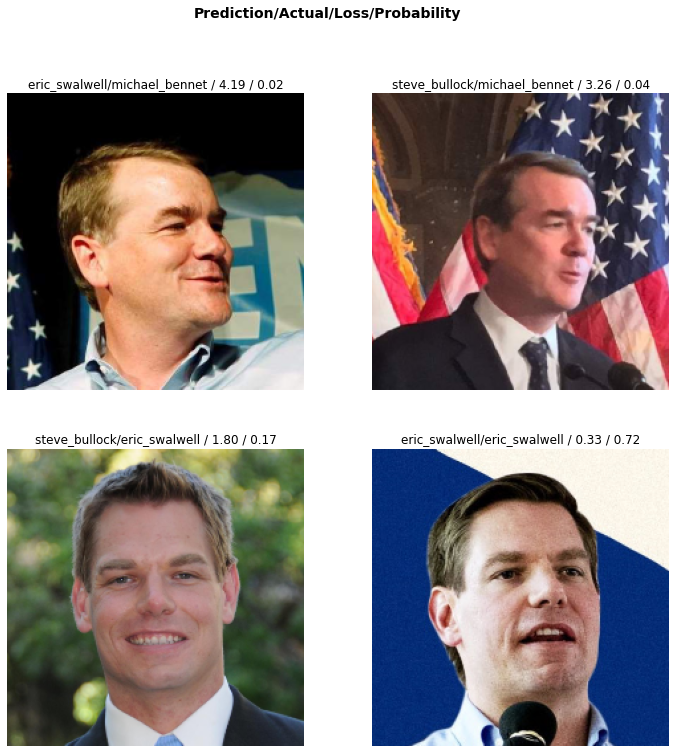

In [21]:
interp.plot_top_losses(4)

I'm not sure that the confusion matrix or top loss items tell us much except that Eric Swalwell's old hairstyle makes the model think he is Steve Bullock. 